In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import exists
#
if not exists(".isparent"):
    %cd -q ../
! echo "current working dir:" $(pwd)

current working dir: /home/opisthofulax/PhD/projects/ising-model


(0.01, 1)

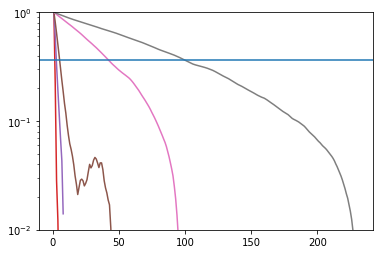

In [23]:
for beta in [0.03, 0.05, 0.17, 0.25, 0.31, 0.35, 0.41, 0.43]:
    pth = f"res/obs/N=1000/bt={beta:.2g}/ACF_avg=10.bin"
    a = np.fromfile(pth, dtype=np.double)
    x = np.linspace(1, np.argmax(a<0), num=np.argmax(a<0))
    plt.plot(x, a[:np.argmax(a<0)])
plt.axhline(1/np.exp(1))
plt.yscale("log")
plt.ylim(0.01, 1)
# plt.xscale("log")

7